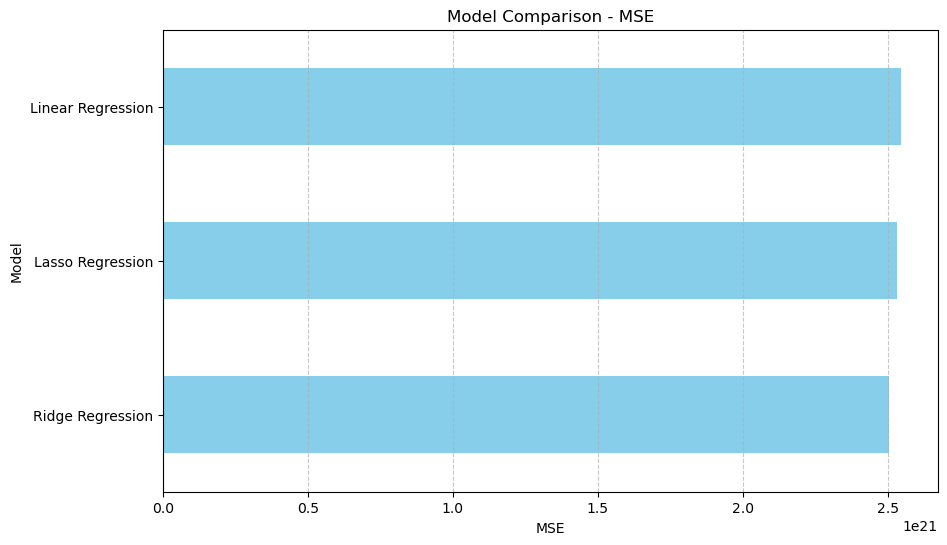

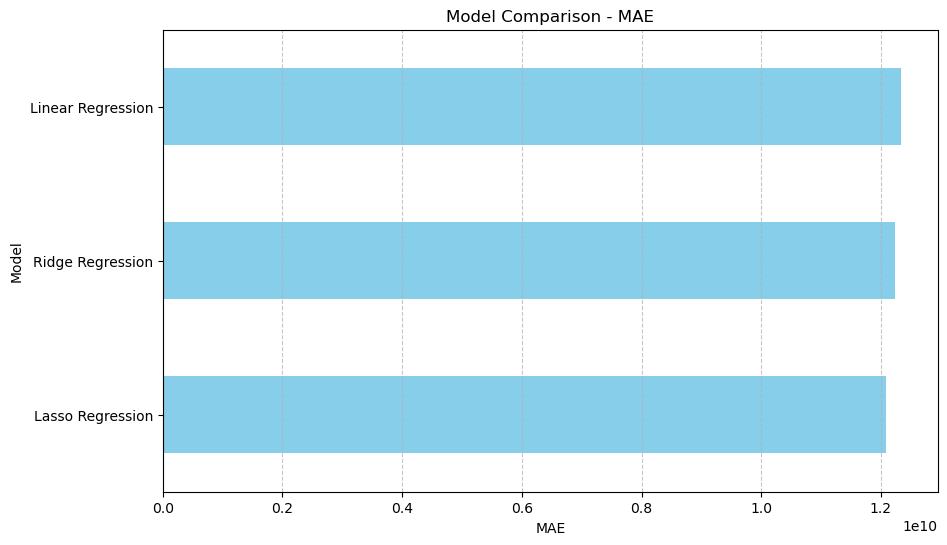

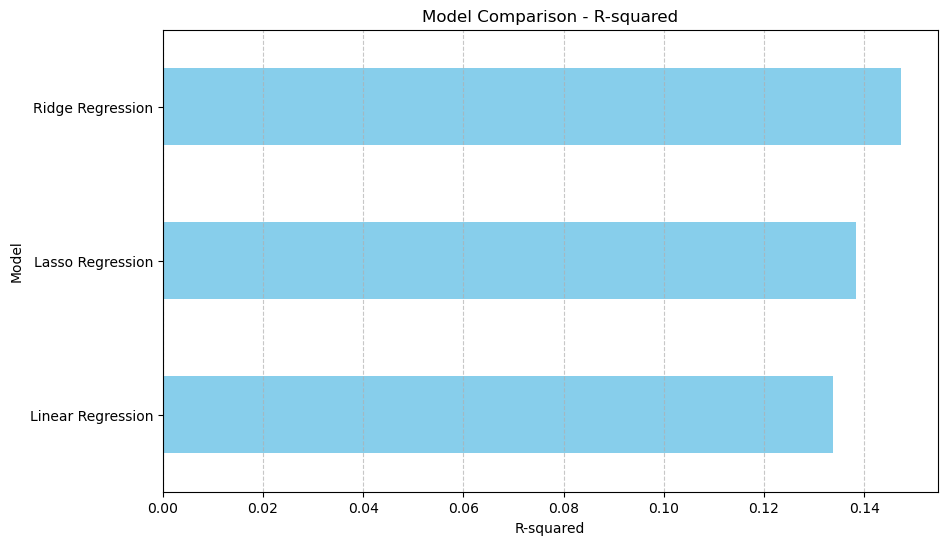


Model Performance Metrics
                            MSE           MAE  R-squared
Linear Regression  2.545620e+21  1.233265e+10   0.133737
Ridge Regression   2.505705e+21  1.222778e+10   0.147320
Lasso Regression   2.531838e+21  1.208694e+10   0.138427


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
# Load dataset
file_path = "Data_Source/Global_Economy_Indicators.csv"
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Sort by Country and Year to calculate GDP growth
data_sorted = data.sort_values(by=["CountryID", "Year"])

data_sorted["GDP Growth"] = data_sorted.groupby("CountryID")["Gross Domestic Product (GDP)"].diff()

# Drop rows with NaN target (first year of each country)
data_cleaned = data_sorted.dropna(subset=["GDP Growth"])

# Define features and target
excluded_columns = ["CountryID", "Country", "Year", "Currency", "GDP Growth"]
features = data_cleaned.drop(columns=excluded_columns)
target = data_cleaned["GDP Growth"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R-squared": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plotting performance metrics
metrics_to_plot = ["MSE", "MAE", "R-squared"]
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    results_df[metric].sort_values().plot(kind="barh", color="skyblue")
    plt.title(f"Model Comparison - {metric}")
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

# Print results
def print_results_table(df):
    print("\nModel Performance Metrics")
    print("=" * 50)
    print(df)

print_results_table(results_df)
